In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


'2019-03-18 08:56:16.036397'

In [105]:
StClair_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_StClair.csv')
CentralBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_CentralBasin.csv')
EasternBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_EasternBasin.csv')
WesternBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_WesternBasin.csv')

StClair_ERA5['evap'] = -StClair_ERA5['evap']
CentralBasin_ERA5['evap'] = -CentralBasin_ERA5['evap']
EasternBasin_ERA5['evap'] = -EasternBasin_ERA5['evap']
WesternBasin_ERA5['evap'] = -WesternBasin_ERA5['evap']

CentralBasin_ERA5.describe()

for c in StClair_ERA5.columns[1:]:
    StClair_ERA5[c] = StClair_ERA5[c] * (StClair_ERA5[c] > 0)

StClair_ERA5['date'] = pd.to_datetime(StClair_ERA5['date'], errors='coerce')
StClair_ERA5['year'] = StClair_ERA5.date.dt.year
# StClair_ERA5 = StClair_ERA5.groupby(['year']).mean()

# StClair_ERA5['precip'] = StClair_ERA5['precip']*365
# StClair_ERA5['evap'] = StClair_ERA5['evap']*365
# StClair_ERA5['surf_runoff'] = StClair_ERA5['evap']*365

StClair_ERA5

for c in WesternBasin_ERA5.columns[1:]:
    WesternBasin_ERA5[c] = WesternBasin_ERA5[c] * (WesternBasin_ERA5[c] > 0)

WesternBasin_ERA5['date'] = pd.to_datetime(WesternBasin_ERA5['date'], errors='coerce')
WesternBasin_ERA5['year'] = WesternBasin_ERA5.date.dt.year
# WesternBasin_ERA5 = WesternBasin_ERA5.groupby(['year']).mean()

# WesternBasin_ERA5['precip'] = WesternBasin_ERA5['precip']*365
# WesternBasin_ERA5['evap'] = WesternBasin_ERA5['evap']*365
# WesternBasin_ERA5['surf_runoff'] = WesternBasin_ERA5['surf_runoff']*365

WesternBasin_ERA5

CentralBasin_ERA5['date'] = pd.to_datetime(CentralBasin_ERA5['date'], errors='coerce')
CentralBasin_ERA5['year'] = CentralBasin_ERA5.date.dt.year
# CentralBasin_ERA5 = CentralBasin_ERA5.groupby(['year']).mean()

# CentralBasin_ERA5['precip'] = CentralBasin_ERA5['precip']*365
# CentralBasin_ERA5['evap'] = CentralBasin_ERA5['evap']*365
# CentralBasin_ERA5['surf_runoff'] = CentralBasin_ERA5['surf_runoff']*365

CentralBasin_ERA5

EasternBasin_ERA5['date'] = pd.to_datetime(EasternBasin_ERA5['date'], errors='coerce')
EasternBasin_ERA5['year'] = EasternBasin_ERA5.date.dt.year
# EasternBasin_ERA5 = EasternBasin_ERA5.groupby(['year']).mean()

# EasternBasin_ERA5['precip'] = EasternBasin_ERA5['precip']*365
# EasternBasin_ERA5['evap'] = EasternBasin_ERA5['evap']*365
# EasternBasin_ERA5['surf_runoff'] = EasternBasin_ERA5['surf_runoff']*365

EasternBasin_ERA5

,date,precip,cloud,evap,surf_runoff,year
0,2002-01-01,2.236307e+00,0.716296,2.667775,0.000000e+00,2002
1,2002-01-02,2.103122e-01,0.401624,2.240147,-4.163336e-14,2002
2,2002-01-03,1.078426e-01,0.823043,2.216830,0.000000e+00,2002
3,2002-01-04,1.122731e-01,0.768728,2.686401,8.326673e-14,2002
4,2002-01-05,1.450323e-01,0.911535,2.574709,4.120113e-04,2002
5,2002-01-06,4.514021e+00,0.983722,1.093649,2.404620e-03,2002
6,2002-01-07,4.626530e+00,0.914706,1.536369,1.747901e-04,2002
7,2002-01-08,7.332956e-02,0.833909,2.707317,-4.163336e-14,2002
8,2002-01-09,1.959288e+00,0.730232,1.533773,6.096490e-02,2002
9,2002-01-10,3.583337e-02,0.836911,0.112472,5.877946e-02,2002


In [99]:
Area = 26858*1e6 #m2
Area_ecl_stClair = 25744*1e6 #m2
conversion_fac_mmy_to_cms = Area_ecl_stClair/1000/365/24/3600
conversion_fac_mmy_to_cms_incl_clair = Area/1000/365/24/3600
conversion_fac_mmy_to_cms_st_clair = (Area - Area_ecl_stClair)/1000/365/24/3600
conversion_fac_mmy_to_cms_eastern = 6.91e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_western = 2.842e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_central = (Area_ecl_stClair - 6.91e+9 - 2.842e+9)/1000/365/24/3600

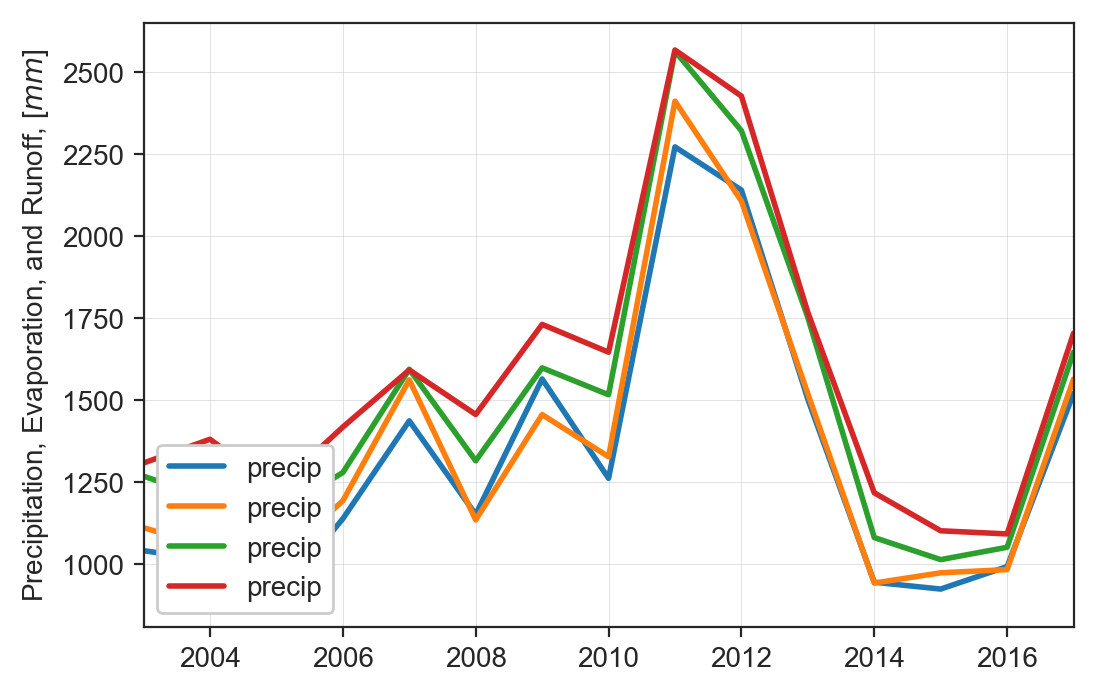

In [14]:
f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)

axes.plot(StClair_ERA5.index, StClair_ERA5.precip, lw=2)
axes.plot(WesternBasin_ERA5.index, WesternBasin_ERA5.precip, lw=2)
axes.plot(CentralBasin_ERA5.index, CentralBasin_ERA5.precip, lw=2)
axes.plot(EasternBasin_ERA5.index, EasternBasin_ERA5.precip, lw=2)
# axes.plot(StClair_ERA5.index, StClair_ERA5.evap, c=sns.color_palette()[1], lw=2)
axes.set_xlabel('')
axes.grid(lw=0.2)

# axes.set_ylim(0,None)
axes.set_xlim(2003,2017)
axes.set_ylabel('$mm$')
axes.set_ylabel('Precipitation, Evaporation, and Runoff, [$mm$]')


# ax2 = axes.twinx()

# ax2.plot(np.linspace(2003,2017, 15), st_clair_inflow_mm, c=sns.color_palette()[3], lw=2)
# ax2.plot(np.linspace(2003,2017, 15), detroit_river_mm, c=sns.color_palette()[4], lw=2)


# ax2.set_ylabel('Inflow and Outflow, [$mm$]')
# ax2.set_ylim(0,None)
# f.savefig('Mass Balance/wind_precip_1900.pdf')

axes.legend(loc=3, frameon=1, framealpha=1)
# ax2.legend(['Inflow', 'Outflow'], loc=4, frameon=1, framealpha=1)

# ax2.plot(np.linspace(2003,2017, 15), st_clair_inflow_mm, c=sns.color_palette()[3], lw=2)
# ax2.plot(np.linspace(2003,2017, 15), detroit_river_mm, c=sns.color_palette()[4], lw=2)


# ax2.set_ylabel('Inflow and Outflow, [$mm$]')
# ax2.set_ylim(0,None)
# f.savefig('Mass Balance/wind_precip_1900.pdf')

# axes.legend(['Precipitation', 'Evaporation'], loc=3, frameon=1, framealpha=1)
# ax2.legend(['Inflow', 'Outflow'], loc=4, frameon=1, framealpha=1)

NameError: name 'Precip_mm' is not defined

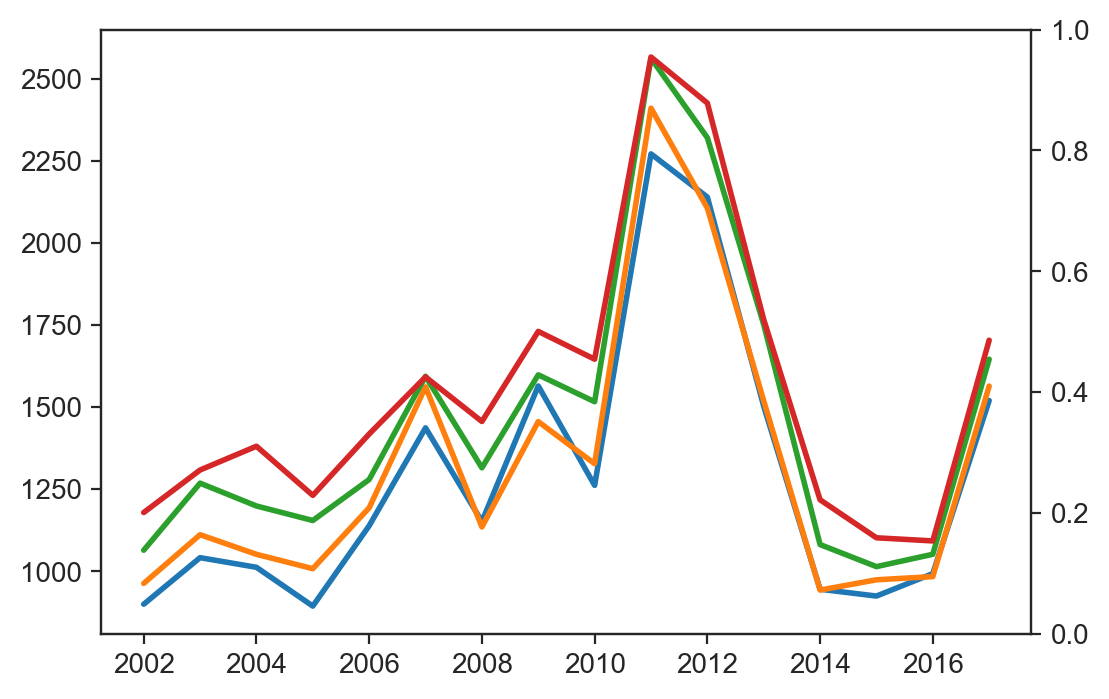

In [6]:
f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)

axes.plot(StClair_ERA5.index, StClair_ERA5.precip, c=sns.color_palette()[0], lw=2, label='St. Clair Basin')
axes.plot(StClair_ERA5.index, WesternBasin_ERA5.precip, c=sns.color_palette()[1], lw=2, label='Western Basin')
axes.plot(StClair_ERA5.index, CentralBasin_ERA5.precip, c=sns.color_palette()[2], lw=2, label='Central Basin')
axes.plot(StClair_ERA5.index, EasternBasin_ERA5.precip, c=sns.color_palette()[3], lw=2, label='Eastern Basin')


ax2 = axes.twinx()
# ax2.plot(StClair_ERA5.index, StClair_ERA5.evap, c=sns.color_palette()[0], ls='-.', lw=1, label='St. Clair Basin')
# ax2.plot(StClair_ERA5.index, WesternBasin_ERA5.evap, c=sns.color_palette()[1], ls='-.', lw=1, label='Western Basin')
# ax2.plot(StClair_ERA5.index, CentralBasin_ERA5.evap, c=sns.color_palette()[2], ls='-.', lw=1, label='Central Basin')
# ax2.plot(StClair_ERA5.index, EasternBasin_ERA5.evap, c=sns.color_palette()[3], ls='-.', lw=1, label='Eastern Basin')
# ax2.legend(title='Evaporation', loc=2, frameon=1, framealpha=1, fontsize='small')
# ax2.set_yticks([])

axes.plot(Precip_mm.Year, Precip_mm.Total, c='k', lw=5, label='Glerl')

# ax3 = ax2.twinx()
# ax3.plot(StClair_ERA5.index, StClair_ERA5.surf_runoff, c=sns.color_palette()[0], ls='-.', lw=1, label='St. Clair Basin')
# ax3.plot(StClair_ERA5.index, WesternBasin_ERA5.surf_runoff, c=sns.color_palette()[1], ls='-.', lw=1, label='Western Basin')
# ax3.plot(StClair_ERA5.index, CentralBasin_ERA5.surf_runoff, c=sns.color_palette()[2], ls='-.', lw=1, label='Central Basin')
# ax3.plot(StClair_ERA5.index, EasternBasin_ERA5.surf_runoff, c=sns.color_palette()[3], ls='-.', lw=1, label='Eastern Basin')
# ax3.legend(title='Evaporation', loc=2, frameon=1, framealpha=1, fontsize='small')
# # ax3.set_yticks([])

axes.legend(title='Precipitation', loc=1, frameon=1, framealpha=1, fontsize='small')
axes.set_xlabel('')
axes.grid(lw=0.2)

# axes.set_ylim(0,None)
axes.set_xlim(2003,2017)
axes.set_ylim(0,3000)
ax2.set_ylim(0,3000)
# ax3.set_ylim(0,3000)
axes.set_ylabel('$mm$')
axes.set_ylabel('ERA5 precipitation [$mm$]')



Text(0,0.5,'ERA5 Evaporation [$mm$]')

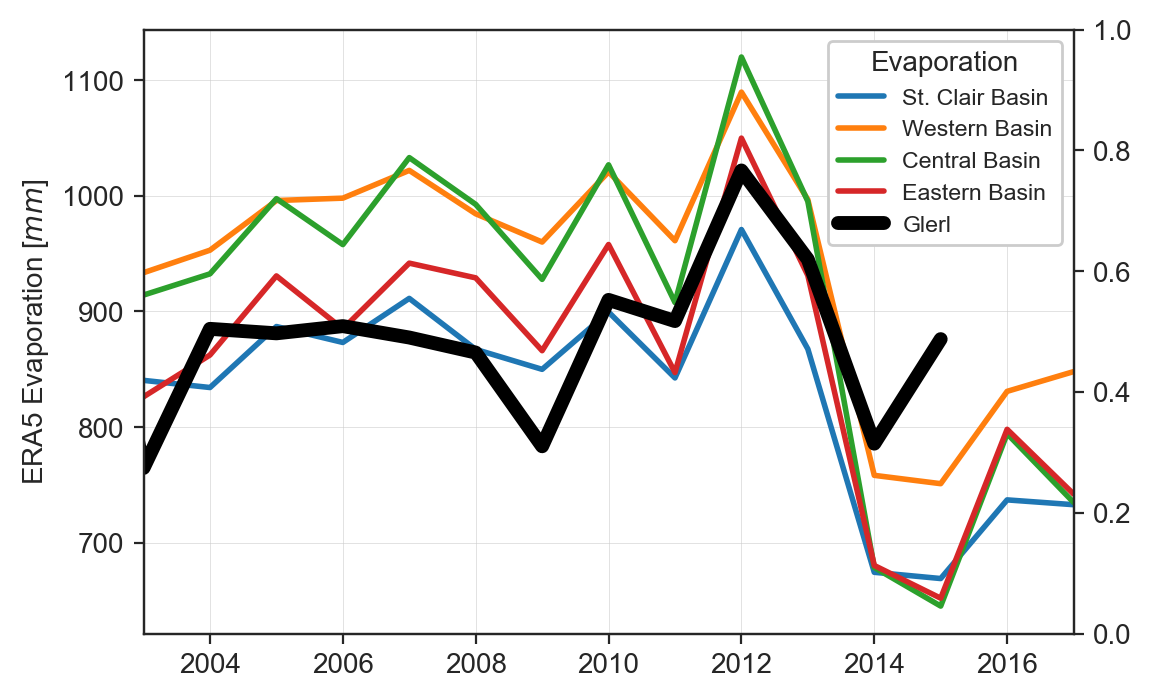

In [13]:
f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)

axes.plot(StClair_ERA5.index, StClair_ERA5.evap, c=sns.color_palette()[0], lw=2, label='St. Clair Basin')
axes.plot(StClair_ERA5.index, WesternBasin_ERA5.evap, c=sns.color_palette()[1], lw=2, label='Western Basin')
axes.plot(StClair_ERA5.index, CentralBasin_ERA5.evap, c=sns.color_palette()[2], lw=2, label='Central Basin')
axes.plot(StClair_ERA5.index, EasternBasin_ERA5.evap, c=sns.color_palette()[3], lw=2, label='Eastern Basin')


ax2 = axes.twinx()
# ax2.plot(StClair_ERA5.index, StClair_ERA5.evap, c=sns.color_palette()[0], ls='-.', lw=1, label='St. Clair Basin')
# ax2.plot(StClair_ERA5.index, WesternBasin_ERA5.evap, c=sns.color_palette()[1], ls='-.', lw=1, label='Western Basin')
# ax2.plot(StClair_ERA5.index, CentralBasin_ERA5.evap, c=sns.color_palette()[2], ls='-.', lw=1, label='Central Basin')
# ax2.plot(StClair_ERA5.index, EasternBasin_ERA5.evap, c=sns.color_palette()[3], ls='-.', lw=1, label='Eastern Basin')
# ax2.legend(title='Evaporation', loc=2, frameon=1, framealpha=1, fontsize='small')
# ax2.set_yticks([])

axes.plot(Evap_mm.Year, Evap_mm.Annual, c='k', lw=5, label='Glerl')

# ax3 = ax2.twinx()
# ax3.plot(StClair_ERA5.index, StClair_ERA5.surf_runoff, c=sns.color_palette()[0], ls='-.', lw=1, label='St. Clair Basin')
# ax3.plot(StClair_ERA5.index, WesternBasin_ERA5.surf_runoff, c=sns.color_palette()[1], ls='-.', lw=1, label='Western Basin')
# ax3.plot(StClair_ERA5.index, CentralBasin_ERA5.surf_runoff, c=sns.color_palette()[2], ls='-.', lw=1, label='Central Basin')
# ax3.plot(StClair_ERA5.index, EasternBasin_ERA5.surf_runoff, c=sns.color_palette()[3], ls='-.', lw=1, label='Eastern Basin')
# ax3.legend(title='Evaporation', loc=2, frameon=1, framealpha=1, fontsize='small')
# # ax3.set_yticks([])

axes.legend(title='Evaporation', loc=1, frameon=1, framealpha=1, fontsize='small')
axes.set_xlabel('')
axes.grid(lw=0.2)

# axes.set_ylim(0,None)
axes.set_xlim(2003,2017)
# axes.set_ylim(0,3000)
# ax2.set_ylim(0,3000)
# ax3.set_ylim(0,3000)
axes.set_ylabel('$mm$')
axes.set_ylabel('ERA5 Evaporation [$mm$]')



In [23]:
Area = 26858*1e6 #m2

In [8]:
station_45005 = pd.read_csv('../../measurements/Excel Files/task 1/Mass Balance/station_45005.csv', skiprows=1)

In [9]:
station_45005['WSPD'] = pd.to_numeric(station_45005['WSPD'], errors='coerce')
station_45005['GST'] = pd.to_numeric(station_45005['GST'], errors='coerce')
station_45005['ATMP'] = pd.to_numeric(station_45005['ATMP'], errors='coerce')
station_45005['YY'] = pd.to_numeric(station_45005['YY'], errors='coerce')
station_45005=station_45005.groupby(['YY']).mean().reset_index()
Precip_mm = pd.read_excel('../../measurements/glerl/Precip_Lake.xlsx', sheetname='ERI_mm', skiprows=3)
Precip_mm['Total'] = pd.to_numeric(Precip_mm['Total'], errors='coerce')
Precip_mm['Year'] = pd.to_numeric(Precip_mm['Year'], errors='coerce')

Runoff_mm = pd.read_excel('../../measurements/glerl/Runoff.xlsx', sheetname='ERI_mm', skiprows=4)
Runoff_mm['Ann'] = pd.to_numeric(Runoff_mm['Ann'], errors='coerce')
Runoff_mm['YEAR'] = pd.to_numeric(Runoff_mm['YEAR'], errors='coerce')
WindSpeed_Overlake = pd.read_excel('../../measurements/glerl/WindSpeed_Overlake.xlsx', sheetname='ERI', skiprows=3)
WindSpeed_Overlake['Annual'] = pd.to_numeric(WindSpeed_Overlake['Annual'], errors='coerce')
WindSpeed_Overlake['Year'] = pd.to_numeric(WindSpeed_Overlake['Year'], errors='coerce')

Evap_mm = pd.read_excel('../../measurements/glerl/Evaporation.xlsx', sheetname='ERI', skiprows=3)
Evap_mm['Annual'] = pd.to_numeric(Evap_mm['Ann'], errors='coerce')
Evap_mm['Year'] = pd.to_numeric(Evap_mm['Year'], errors='coerce')


In [10]:
Evap_mm

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Ann,Annual
0,1950.0,38.480000,38.890000,30.520000,14.060000,7.000000,49.830000,73.90000,113.480000,152.040000,138.72,191.880000,78.140000,926.940000,926.940000
1,1951.0,31.250000,16.490000,15.750000,3.300000,15.550000,34.200000,79.05000,124.350000,178.930000,156.70,161.230000,74.780000,891.580000,891.580000
2,1952.0,29.740000,22.410000,19.040000,5.820000,29.470000,37.480000,102.13000,121.890000,169.500000,235.02,110.330000,77.030000,959.860000,959.860000
3,1953.0,34.340000,35.290000,20.990000,25.170000,20.440000,36.210000,96.74000,117.700000,188.230000,152.86,143.330000,124.160000,995.460000,995.460000
4,1954.0,44.310000,13.880000,30.880000,7.260000,37.430000,37.120000,90.00000,129.420000,143.690000,165.01,138.540000,94.050000,931.590000,931.590000
5,1955.0,48.020000,16.270000,22.380000,1.640000,30.830000,52.500000,83.96000,139.200000,170.490000,174.12,168.510000,74.880000,982.800000,982.800000
6,1956.0,29.900000,16.200000,18.790000,4.600000,14.430000,30.430000,64.28000,95.100000,155.420000,125.26,155.520000,63.390000,773.320000,773.320000
7,1957.0,40.340000,12.600000,11.350000,5.950000,21.990000,34.720000,71.98000,123.760000,126.180000,167.54,136.020000,68.690000,821.120000,821.120000
8,1958.0,39.350000,23.580000,10.890000,5.000000,19.870000,46.130000,48.48000,111.020000,122.680000,163.92,137.550000,80.500000,808.970000,808.970000
9,1959.0,20.190000,12.210000,14.640000,0.030000,-4.050000,29.370000,55.71000,75.060000,162.590000,187.28,151.900000,56.690000,761.620000,761.620000


In [11]:
Runoff_mm[105:119].mean()[1:13]

JAN    114.226763
FEB     91.581745
MAR    164.926388
APR    115.514231
MAY     90.762773
JUN     67.904277
JUL     48.885788
AUG     30.530336
SEP     29.430294
OCT     43.392388
NOV     59.757487
DEC    113.965250
dtype: float64

Text(0,0.5,'Precipitation, [$mm$]')

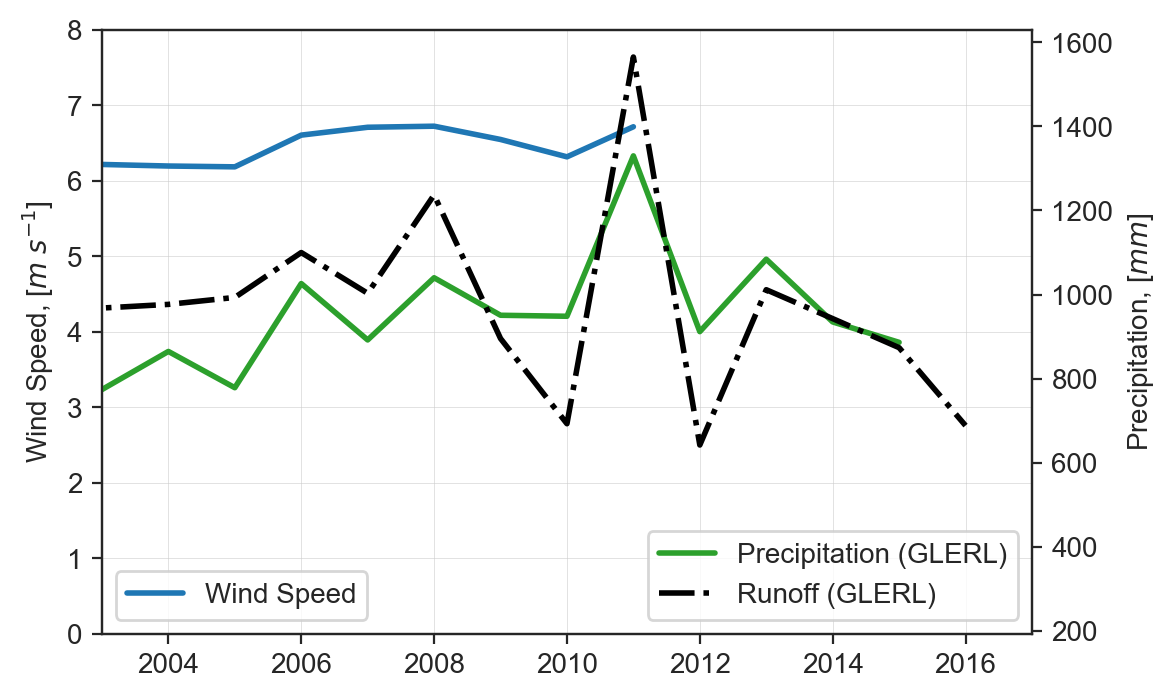

In [12]:
f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)
# axes.plot(df.YY, df.WSPD, c=sns.color_palette()[0])
axes.plot(WindSpeed_Overlake.Year, WindSpeed_Overlake.Annual, c=sns.color_palette()[0], lw=2)
# sns.boxplot(x="YY", y="WSPD", data=df, ax=axes[0], color=sns.color_palette()[0], fliersize=0)
# axes.plot(df.YY, df.GST, c=sns.color_palette()[0], ls=':')
# axes[1].plot(df.YY, df.ATMP, c=sns.color_palette()[0])
# for ax in axes:
# axes.set_xlim(1950,2015)
#     ax.set_ylim(0,15)
axes.set_xlabel('')
axes.grid(lw=0.2)
ax2 = axes.twinx()
ax2.plot(Precip_mm.Year, Precip_mm.Total, c=sns.color_palette()[2], lw=2)
ax2.plot(Runoff_mm.YEAR, Runoff_mm.Ann, 'k-.', lw=2)
ax2.legend(['Precipitation (GLERL)', 'Runoff (GLERL)'], loc=4)
axes.legend(['Wind Speed'], loc=3)
# ax2.set_ylim(0,2000)
axes.set_ylim(0,8)
axes.set_xlim(2003,2017)
axes.set_ylabel('Wind Speed, [$m$ $s^{-1}$]')
ax2.set_ylabel('Precipitation, [$mm$]')
# f.savefig('Mass Balance/wind_precip_1900.pdf')

In [15]:
StClair_ERA5.precip

year
2002     899.065970
2003    1040.962261
2004    1011.573943
2005     893.354426
2006    1138.188013
2007    1436.481506
2008    1151.196229
2009    1564.135169
2010    1261.280814
2011    2271.202892
2012    2139.625999
2013    1502.399054
2014     944.736415
2015     923.967104
2016     992.482349
2017    1519.711951
Name: precip, dtype: float64

In [27]:
CB_g = CentralBasin_ERA5.set_index('date').groupby(pd.Grouper(freq='M')).mean().reset_index()

In [31]:
CB_g['month'] = CB_g['date'].dt.month

In [50]:
CB_g.tail()

,date,precip,cloud,evap,surf_runoff,year,month
187,2017-08-31,2.272816,0.451267,2.921869,0.040869,2017,8
188,2017-09-30,1.805882,0.431562,2.663824,0.008949,2017,9
189,2017-10-31,4.912479,0.601739,3.435202,0.078885,2017,10
190,2017-11-30,4.768536,0.734205,3.542233,0.155516,2017,11
191,2017-12-31,2.891838,0.796503,3.053519,0.006593,2017,12


2005 37.93009284852277 0.5691368469668753
2016 34.51209390221758 0.89288295449384


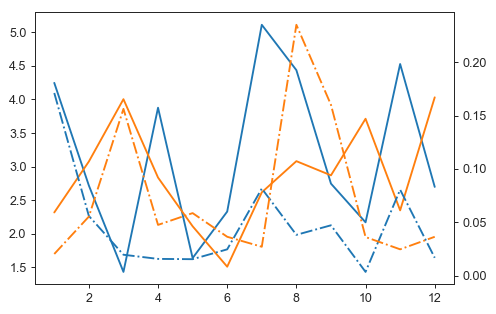

In [84]:
years = [2005,2016]
f, ax1 = plt.subplots(1)

ax2=ax1.twinx()
for y in years:
    ax1.plot(CB_g[CB_g.year==y].month, CB_g[CB_g.year==y].precip,)
    ax2.plot(CB_g[CB_g.year==y].month, CB_g[CB_g.year==y].surf_runoff, ls='-.')
    print(y, CB_g[CB_g.year==y].precip.sum(), CB_g[CB_g.year==y].surf_runoff.sum())


# sns.lineplot(x='month', y='precip', data=CB_g[CB_g.year.isin(years)], hue='year', palette="tab10", ax=ax1)
# sns.lineplot(x='month', y='surf_runoff', data=CB_g[CB_g.year.isin(years)], hue='year', ax=ax2)

In [85]:
CB_g[CB_g.year==y].precip.sum()

34.51209390221758

In [124]:
CentralBasin_ERA5[CentralBasin_ERA5.precip<100].groupby(
    CentralBasin_ERA5[CentralBasin_ERA5.precip<100].date.dt.year).mean()[
    'precip'].values*365*conversion_fac_mmy_to_cms_central




array([539.38472208, 642.96918827, 607.72913845, 585.29726516,
       648.61566469, 570.7830007 , 666.72478211, 571.61075054,
       548.66632261, 808.89823444, 527.31832444, 692.68457133,
       548.09829632, 514.00137048, 533.10733374, 626.04610952])

In [121]:
CentralBasin_ERA5[CentralBasin_ERA5.precip<100].describe()

,precip,cloud,evap,surf_runoff,year
count,5833.000000,5833.000000,5833.000000,5.833000e+03,5833.00000
mean,3.252139,0.619083,2.521758,8.289407e-02,2009.49580
std,5.954803,0.288795,2.238340,3.598569e-01,4.61156
min,0.000000,0.000000,-3.256513,-1.665335e-13,2002.00000
25%,0.033773,0.395867,0.723120,3.710578e-05,2005.00000
50%,0.627455,0.671250,2.070878,2.787000e-03,2009.00000
75%,3.624004,0.872792,4.009684,3.180846e-02,2014.00000
max,59.096539,1.000000,14.739750,1.282917e+01,2017.00000


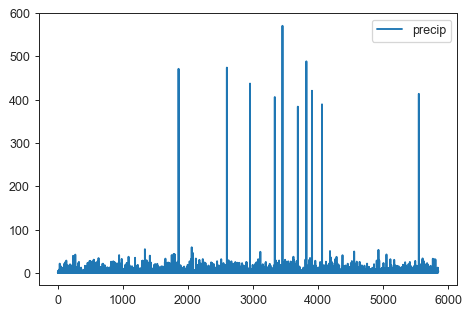

In [118]:
CentralBasin_ERA5.plot(y='precip')